<span style="font-size: 150%;color:white;background:#38761d"> A task for the recruitment process

<span style="font-size: 150%;color:white;background:red">Wojciech Moszczyński



<span style="font-size: 300%;color:white;background:#38761d">neural network   
    
    from:
https://archive.ics.uci.edu/ml/datasets/Sales_Transactions_Dataset_Weekly.


<span style="font-size: 150%;color:#0c343d;background:#fff2cc"> For the first 10 products, please conduct the exploratory analysis and compute the forecast for the next 7 weeks.  

In [4]:
import pandas as pd
import numpy as np
#%matplotlib inline
import seaborn as sns
#import matplotlib.pyplot as plt
import torch

import warnings 
warnings.filterwarnings("ignore")

device = torch.device('cuda') 

from sklearn.metrics import mean_squared_log_error

ModuleNotFoundError: No module named 'seaborn'

In [2]:
df = pd.read_csv('/media/wojciech/D6DE33C1DE339927/1A/dane7.csv')    
print(df.dtypes)
df.head(4)

Unnamed: 0                int64
Timestamp                object
Value                     int64
do100                     int64
kon                     float64
val_diff                float64
ZNAK                      int64
zeK                       int64
do100Plus                 int64
prognoza                float64
Prognoza_skorygowana    float64
dtype: object


,Unnamed: 0,Timestamp,Value,do100,kon,val_diff,ZNAK,zeK,do100Plus,prognoza,Prognoza_skorygowana
0,0,2020-05-01 00:00:00,0,0,NaN,NaN,1,0,0,100.0,NaN
1,1,2020-05-01 00:00:01,0,1,NaN,NaN,1,0,1,100.0,NaN
2,2,2020-05-01 00:00:02,0,2,NaN,NaN,1,0,2,100.0,NaN
3,3,2020-05-01 00:00:03,0,3,NaN,NaN,1,0,3,100.0,100.0


In [3]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [4]:

df['hour']= df['Timestamp'].dt.hour.astype(np.float32)
df['minute']= df['Timestamp'].dt.minute.astype(np.float32)
df['second']= df['Timestamp'].dt.second.astype(np.float32)
df.head(3)

,Unnamed: 0,Timestamp,Value,do100,kon,val_diff,ZNAK,zeK,do100Plus,prognoza,Prognoza_skorygowana,hour,minute,second
0,0,2020-05-01 00:00:00,0,0,NaN,NaN,1,0,0,100.0,NaN,0.0,0.0,0.0
1,1,2020-05-01 00:00:01,0,1,NaN,NaN,1,0,1,100.0,NaN,0.0,0.0,1.0
2,2,2020-05-01 00:00:02,0,2,NaN,NaN,1,0,2,100.0,NaN,0.0,0.0,2.0


In [5]:
df = df.dropna(how='any')

In [6]:
df.columns

Index(['Unnamed: 0', 'Timestamp', 'Value', 'do100', 'kon', 'val_diff', 'ZNAK',
       'zeK', 'do100Plus', 'prognoza', 'Prognoza_skorygowana', 'hour',
       'minute', 'second'],
      dtype='object')

In [7]:
df.shape

(4347, 14)

max: 100
min: 0


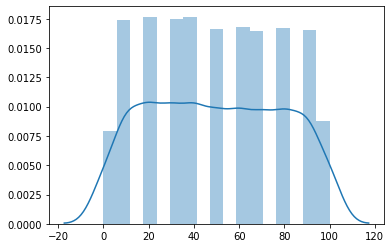

In [8]:
print('max:',df['Value'].max())
print('min:',df['Value'].min())

sns.distplot(np.array(df['Value']))

<span style="font-size: 110%;color:#0c343d;background:#fff2cc">The population 

<span style="font-size: 110%;color:#0c343d;background:#fff2cc">Then we 

<span style="font-size: 210%;color:#0c343d;background:#fff2cc"> We create 
    
<span style="font-size: 110%;color:#0c343d;background:#fff2cc">Now I creat

<span style="font-size: 110%;color:#0c343d;background:#fff2cc">Describing variables before scaling

In [9]:
x = df[['do100', 'kon', 'val_diff', 'ZNAK','zeK', 'do100Plus', 'prognoza', 'Prognoza_skorygowana', 'hour', 'minute', 'second']]
y = df['Value']

<span style="font-size: 110%;color:#0c343d;background:#fff2cc">I download data - I do not need standardized sales because the primary data is enough for me.

<span style="font-size: 140%;color:#0c343d;background:#fff2cc">Dividing time series data into training and test sets.

<span style="font-size: 110%;color:#0c343d;background:#fff2cc">I split the set for training data for the first 42 weeks, then I separate the 44 and 45 test data set. Finally, as instructed, I allow a period of 7 weeks to make a forecast for 10 products. This will be the week: 45, 46, 47, 48, 49, 50, 51, 52. I will use this data at the end of the task when I have my model ready.

In [10]:
df['hour'].value_counts()

0.0    3122
1.0    1225
Name: hour, dtype: int64

In [11]:
del df['Timestamp'] 

In [12]:
train = df[df['hour'] == 0]
test = df[df['hour'] == 1]

In [13]:
test.head(3)

,Unnamed: 0,Value,do100,kon,val_diff,ZNAK,zeK,do100Plus,prognoza,Prognoza_skorygowana,hour,minute,second
3600,3600,0,65,5.0,-10.0,-1,0,-65,40.0,30.0,1.0,0.0,0.0
3601,3601,0,66,6.0,-10.0,-1,0,-66,40.0,30.0,1.0,0.0,1.0
3602,3602,0,67,7.0,-10.0,-1,0,-67,40.0,40.0,1.0,0.0,2.0


In [14]:
train.head(3)

,Unnamed: 0,Value,do100,kon,val_diff,ZNAK,zeK,do100Plus,prognoza,Prognoza_skorygowana,hour,minute,second
13,13,10,13,3.0,10.0,1,0,13,10.0,10.0,0.0,0.0,13.0
14,14,10,14,4.0,10.0,1,0,14,10.0,10.0,0.0,0.0,14.0
15,15,10,15,5.0,10.0,1,0,15,10.0,10.0,0.0,0.0,15.0


In [15]:
Xtrain, Xtest = train.drop(['Value'], axis=1), test.drop(['Value'], axis=1) 
ytrain, ytest = train['Value'].values, test['Value'].values                  

<span style="font-size: 110%;color:#0c343d;background:#fff2cc">Score (quantity of sales) before scaling</span>  

In [16]:
ytrain[:5]

array([10, 10, 10, 10, 10])

In [17]:
ytest[:5]

array([0, 0, 0, 0, 0])

<span style="font-size: 110%;color:#0c343d;background:#fff2cc">Describing variables before scaling

In [18]:
Xtrain[:3]

,Unnamed: 0,do100,kon,val_diff,ZNAK,zeK,do100Plus,prognoza,Prognoza_skorygowana,hour,minute,second
13,13,13,3.0,10.0,1,0,13,10.0,10.0,0.0,0.0,13.0
14,14,14,4.0,10.0,1,0,14,10.0,10.0,0.0,0.0,14.0
15,15,15,5.0,10.0,1,0,15,10.0,10.0,0.0,0.0,15.0


In [19]:
Xtest[:3]

,Unnamed: 0,do100,kon,val_diff,ZNAK,zeK,do100Plus,prognoza,Prognoza_skorygowana,hour,minute,second
3600,3600,65,5.0,-10.0,-1,0,-65,40.0,30.0,1.0,0.0,0.0
3601,3601,66,6.0,-10.0,-1,0,-66,40.0,30.0,1.0,0.0,1.0
3602,3602,67,7.0,-10.0,-1,0,-67,40.0,40.0,1.0,0.0,2.0


<span style="font-size: 140%;color:#0c343d;background:#fff2cc"> Scaling (normalization) of the X value

<span style="font-size: 110%;color:#0c343d;background:#fff2cc">X should never be too big. Ideally, it should be in the range [-1, 1]. If this is not the case, normalize the input.

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)

print(np.round(Xtrain.std(), decimals=2), np.round(Xtrain.mean(), decimals=2))

0.96 0.0


In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Xtest = sc.fit_transform(Xtest)

print(np.round(Xtest.std(), decimals=2), np.round(Xtest.mean(), decimals=2))

0.96 -0.0


In [22]:
ytrain = (ytrain / 100)  # max test score is 100
#print(y.head(3))
print(np.round(ytrain.std(), decimals=2), np.round(ytrain.mean(), decimals=2))

0.28 0.5


In [23]:
ytest = (ytest / 100)  # max test score is 100
#print(y.head(3))
print(np.round(ytest.std(), decimals=2), np.round(ytest.mean(), decimals=2))

0.31 0.5


<span style="font-size: 140%;color:#0c343d;background:#fff2cc"> Creates random input and output

In [24]:
#Xtrain = Xtrain.values 
Xtrain = torch.tensor(Xtrain).cuda()
print(Xtrain[:3])

tensor([[-1.7489, -1.6074, -0.5330,  0.9986,  0.9987, -0.3326,  0.2128, -1.5280,
         -1.5379,  0.0000, -1.7328, -0.9570],
        [-1.7479, -1.5687, -0.1839,  0.9986,  0.9987, -0.3326,  0.2294, -1.5280,
         -1.5379,  0.0000, -1.7328, -0.8992],
        [-1.7469, -1.5301,  0.1653,  0.9986,  0.9987, -0.3326,  0.2459, -1.5280,
         -1.5379,  0.0000, -1.7328, -0.8414]], device='cuda:0',
       dtype=torch.float64)


In [25]:
Xtrain = Xtrain.type(torch.FloatTensor).cuda()
print(Xtrain[:3])

tensor([[-1.7489, -1.6074, -0.5330,  0.9986,  0.9987, -0.3326,  0.2128, -1.5280,
         -1.5379,  0.0000, -1.7328, -0.9570],
        [-1.7479, -1.5687, -0.1839,  0.9986,  0.9987, -0.3326,  0.2294, -1.5280,
         -1.5379,  0.0000, -1.7328, -0.8992],
        [-1.7469, -1.5301,  0.1653,  0.9986,  0.9987, -0.3326,  0.2459, -1.5280,
         -1.5379,  0.0000, -1.7328, -0.8414]], device='cuda:0')


In [26]:
#Xtest = Xtest.values       #- jak była normalizacja to to nie działa
Xtest = torch.tensor(Xtest).cuda()
print(Xtest[:3])

tensor([[-1.7330,  0.3653,  0.1703, -0.9988, -1.0008, -0.3371, -1.0659, -0.3782,
         -0.7905,  0.0000, -1.6589, -1.6722],
        [-1.7306,  0.4038,  0.5180, -0.9988, -1.0008, -0.3371, -1.0823, -0.3782,
         -0.7905,  0.0000, -1.6589, -1.6149],
        [-1.7281,  0.4423,  0.8656, -0.9988, -1.0008, -0.3371, -1.0986, -0.3782,
         -0.4125,  0.0000, -1.6589, -1.5577]], device='cuda:0',
       dtype=torch.float64)


In [27]:
Xtest = Xtest.type(torch.FloatTensor).cuda()
print(Xtest[:3])

tensor([[-1.7330,  0.3653,  0.1703, -0.9988, -1.0008, -0.3371, -1.0659, -0.3782,
         -0.7905,  0.0000, -1.6589, -1.6722],
        [-1.7306,  0.4038,  0.5180, -0.9988, -1.0008, -0.3371, -1.0823, -0.3782,
         -0.7905,  0.0000, -1.6589, -1.6149],
        [-1.7281,  0.4423,  0.8656, -0.9988, -1.0008, -0.3371, -1.0986, -0.3782,
         -0.4125,  0.0000, -1.6589, -1.5577]], device='cuda:0')


In [28]:
ytrain = torch.tensor(ytrain).cuda()
print(ytrain[:3])

tensor([0.1000, 0.1000, 0.1000], device='cuda:0', dtype=torch.float64)


In [29]:
ytest = torch.tensor(ytest).cuda()
print(ytest[:3])

tensor([0., 0., 0.], device='cuda:0', dtype=torch.float64)


<span style="font-size: 110%;color:#0c343d;background:#fff2cc">training variables

In [30]:
ytrain = ytrain.type(torch.FloatTensor).cuda()

In [31]:
print('Xtrain:',Xtrain.shape)
print('ytrain:',ytrain.shape)

Xtrain: torch.Size([3122, 12])
ytrain: torch.Size([3122])


<span style="font-size: 110%;color:#0c343d;background:#fff2cc">Add one dimension to the result vector

In [32]:
ytrain = ytrain.view(ytrain.shape[0],1).cuda()
ytrain.shape

torch.Size([3122, 1])

In [33]:
Xtrain

tensor([[-1.7489, -1.6074, -0.5330,  ...,  0.0000, -1.7328, -0.9570],
        [-1.7479, -1.5687, -0.1839,  ...,  0.0000, -1.7328, -0.8992],
        [-1.7469, -1.5301,  0.1653,  ...,  0.0000, -1.7328, -0.8414],
        ...,
        [ 1.7287,  0.2852, -0.8822,  ...,  0.0000,  1.7021,  1.5871],
        [ 1.7297,  0.3238, -0.5330,  ...,  0.0000,  1.7021,  1.6449],
        [ 1.7307,  0.3624, -0.1839,  ...,  0.0000,  1.7021,  1.7028]],
       device='cuda:0')

<span style="font-size: 110%;color:#0c343d;background:#fff2cc">TEST VARIABLES

In [34]:
ytest = ytest.type(torch.FloatTensor)

In [35]:
print('Xtest:',Xtest.shape)
print('ytest:',ytest.shape)

Xtest: torch.Size([1225, 12])
ytest: torch.Size([1225])


<span style="font-size: 110%;color:#0c343d;background:#fff2cc">Add one dimension to the result vector

In [36]:
ytest = ytest.view(ytest.shape[0],1)
ytest.shape

torch.Size([1225, 1])

In [37]:
Xtest[:4]

tensor([[-1.7330,  0.3653,  0.1703, -0.9988, -1.0008, -0.3371, -1.0659, -0.3782,
         -0.7905,  0.0000, -1.6589, -1.6722],
        [-1.7306,  0.4038,  0.5180, -0.9988, -1.0008, -0.3371, -1.0823, -0.3782,
         -0.7905,  0.0000, -1.6589, -1.6149],
        [-1.7281,  0.4423,  0.8656, -0.9988, -1.0008, -0.3371, -1.0986, -0.3782,
         -0.4125,  0.0000, -1.6589, -1.5577],
        [-1.7256,  0.4808,  1.2133, -0.9988, -1.0008, -0.3371, -1.1149, -0.3782,
         -0.4125,  0.0000, -1.6589, -1.5005]], device='cuda:0')

In [38]:
print('Xtrain: ',Xtrain.shape)
print('Xtest:  ',Xtest.shape)
print('----------------------------------------------------')
print('ytrain: ',ytrain.shape)
print('ytest:  ',ytest.shape)

Xtrain:  torch.Size([3122, 12])
Xtest:   torch.Size([1225, 12])
----------------------------------------------------
ytrain:  torch.Size([3122, 1])
ytest:   torch.Size([1225, 1])


<span style="font-size: 140%;color:#0c343d;background:#fff2cc">Definition of the shape of the network

In [39]:
N, D_in = Xtrain.shape
N, D_out = ytrain.shape

H = 500                            ## the number of dimensions of the inner layer
device = torch.device('cuda')

# definiowanie sieci sposób 'append'

In [40]:
import torch.nn as nn

layers = []
layers.append(nn.Linear(D_in, H))   # INPUT Linear


layers.append(nn.LeakyReLU())    ## LeakyReLU
# normalizacja warstwy
#layers.append(nn.BatchNorm1d(H)),
# Apply dropout to prevent overfitting
#layers.append(nn.Dropout(0.9)),         


layers.append(nn.LeakyReLU())    ## LeakyReLU
# normalizacja warstwy
#layers.append(nn.BatchNorm1d(H)),
# Apply dropout to prevent overfitting
#layers.append(nn.Dropout(0.5)), 


layers.append(nn.Sigmoid())  ## Sigmoid
# normalizacja warstwy
layers.append(nn.BatchNorm1d(H)),
# Apply dropout to prevent overfitting
layers.append(nn.Dropout(0.4)), 


layers.append(nn.ReLU(inplace=True))  ## ReLU
# normalizacja warstwy
layers.append(nn.BatchNorm1d(H)),
# Apply dropout to prevent overfitting
layers.append(nn.Dropout(0.4)), 


layers.append(nn.Linear(H, D_out))


net = nn.Sequential(*layers).to(device)

# Definiowanie sieci sposób bezpośredni

In [41]:
net(Xtrain)

tensor([[ 0.2808],
        [-1.7034],
        [ 0.2928],
        ...,
        [ 0.9649],
        [-0.6319],
        [ 0.2796]], device='cuda:0', grad_fn=<AddmmBackward>)

<span style="font-size: 160%;color:#0c343d;background:#fff2cc"> Optimizer


<span style="font-size: 110%;color:#0c343d;background:#fff2cc">lr: Speed of learning -> The speed at which our model updates the weights in the cells each time backward propagation is carried out


In [42]:
#optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0, dampening=0, weight_decay=0, nesterov=False) #-2.401
#optimizer = torch.optim.SGD(net.parameters(), lr=0.1) #-4.086
optimizer = torch.optim.Adam(net.parameters(), lr=0.01) #-5.298
#optimizer = torch.optim.Adamax(net.parameters(), lr=0.01) #-6.610
#optimizer = torch.optim.ASGD(net.parameters(), lr=0.001, lambd=0.001, alpha=0.35, t0=000000.0) #-2.315
#optimizer = torch.optim.LBFGS(net.parameters(), lr=0.01, max_iter=20, max_eval=None, tolerance_grad=1e-05, tolerance_change=1e-09, history_size=100, line_search_fn=None)
#optimizer = torch.optim.RMSprop(net.parameters(), lr=0.01, alpha=0.99, eps=1e-08) #-5.152
#optimizer = torch.optim.Rprop(net.parameters(), lr=0.01, etas=(0.5, 1.2), step_sizes=(1e-06, 50))  #R2:-7.388

<span style="font-size: 160%;color:#0c343d;background:#fff2cc">Loss function

In [43]:
loss_func = torch.nn.MSELoss() #89
#loss_func = torch.nn.L1Loss() #90
#loss_func = torch.nn.CTCLoss(blank=0, reduction='mean', zero_infinity=False)
#loss_func =torch.nn.NLLLoss(weight=None, size_average=None, ignore_index=-100, reduce=None, reduction='mean')
#loss_func =torch.nn.PoissonNLLLoss(log_input=True, full=False, size_average=None, eps=1e-08, reduce=None, reduction='mean')
#loss_func =torch.nn.KLDivLoss(size_average=None, reduce=None, reduction='mean', log_target=False)
#loss_func =torch.nn.BCELoss(weight=None, size_average=None, reduce=None, reduction='mean')
#loss_func =torch.nn.BCEWithLogitsLoss(weight=None, size_average=None, reduce=None, reduction='mean', pos_weight=None)
#loss_func =torch.nn.MarginRankingLoss(margin=0.0, size_average=None, reduce=None, reduction='mean')
#loss_func =torch.nn.HingeEmbeddingLoss(margin=1.0, size_average=None, reduce=None, reduction='mean')
#loss_func =torch.nn.HuberLoss(reduction='mean', delta=1.0)
#loss_func = torch.nn.Flatten(start_dim=1, end_dim=-1)

<span style="font-size: 160%;color:#0c343d;background:#fff2cc">Defining the learning process and learning

In [44]:
inputs = Xtrain                          
outputs = ytrain
for i in range(100000):                         
   prediction = net(inputs)
   loss = loss_func(prediction, outputs) 
   optimizer.zero_grad()
   loss.backward()        
   optimizer.step()       

   if i % 5000 == 0:  
      print(i, loss.item())    

0 0.8548169136047363
5000 0.009437654167413712
10000 0.00744694983586669
15000 0.007247434929013252
20000 0.006527718622237444
25000 0.0062368786893785
30000 0.005957677029073238
35000 0.005586328450590372
40000 0.0058173928409814835
45000 0.0054146405309438705
50000 0.005391018930822611
55000 0.005218924023211002
60000 0.005178633611649275
65000 0.005099192727357149
70000 0.004959053825587034
75000 0.004862888250499964
80000 0.005183638539165258
85000 0.005944341886788607
90000 0.005449776537716389
95000 0.005441475659608841


###  Forecast based on the model
-  substitute the same equations that were in the model
-  The following loss result shows the last model sequence
-  Loss shows how much the model is wrong (loss = sum of error squares) after the last learning sequence

In [45]:
ytest = torch.tensor(ytest).cuda()
print(ytest[:3])

tensor([[0.],
        [0.],
        [0.]], device='cuda:0')


In [46]:
with torch.no_grad():
    y_pred = net(Xtest)  
    loss = (y_pred - ytest).pow(2).sum()

    print(f'Loss train_set: {loss:.8f}')

Loss train_set: 240.09063721


<span style="font-size: 160%;color:#0c343d;background:#fff2cc"> We save the whole model

In [47]:
torch.save(net,'/home/wojciech/Pulpit/7/byk19.pb')

<span style="font-size: 160%;color:#0c343d;background:#fff2cc"> We play the whole model
    
    The model is now not called 'net' but 'KOT'

In [48]:
KOT = torch.load('/home/wojciech/Pulpit/7/byk19.pb') # to ten dobry model
KOT

Sequential(
  (0): Linear(in_features=12, out_features=500, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): LeakyReLU(negative_slope=0.01)
  (3): Sigmoid()
  (4): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): Dropout(p=0.4, inplace=False)
  (6): ReLU(inplace=True)
  (7): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): Dropout(p=0.4, inplace=False)
  (9): Linear(in_features=500, out_features=1, bias=True)
)

In [49]:
with torch.no_grad():
    y_interp = KOT(Xtest)  
    loss = (y_interp - ytest).pow(2).mean()

    print(f'Loss train_set: {loss:.8f}')

Loss train_set: 0.19281460


In [50]:
y_interp

tensor([[0.3488],
        [0.3275],
        [0.3672],
        ...,
        [0.2490],
        [0.2737],
        [0.2203]], device='cuda:0')

<span style="font-size: 110%;color:#0c343d;background:#fff2cc"> By substituting other independent variables, you can get a vector of output variables
We choose a random record from the tensor

In [51]:
y_interp = y_interp
foka = y_interp.cpu().detach().numpy()
df11 = pd.DataFrame(foka)
df11.columns = ['y_interp']
df11=np.round(df11.y_interp)
df11.head(3)

0    0.0
1    0.0
2    0.0
Name: y_interp, dtype: float32

In [52]:
ytest = ytest
foka = ytest.cpu().detach().numpy()
df_t = pd.DataFrame(foka)
df_t.columns = ['y']
df_t.head(3)

,y
0,0.0
1,0.0
2,0.0


In [53]:
NOWA = pd.merge(df_t,df11, how='inner', left_index=True, right_index=True)
NOWA.tail

<bound method NDFrame.tail of         y  y_interp
0     0.0       0.0
1     0.0       0.0
2     0.0       0.0
3     0.0       0.0
4     0.0       0.0
...   ...       ...
1220  0.1       0.0
1221  0.1       0.0
1222  0.1       0.0
1223  0.1       0.0
1224  0.1       0.0

[1225 rows x 2 columns]>

In [54]:
NOWA.to_csv('/home/wojciech/Pulpit/7/NOWA.csv')

Text(0.5, 1.0, 'COURSE OF THE PROJECTING PROCESS ON THE TEST SET')

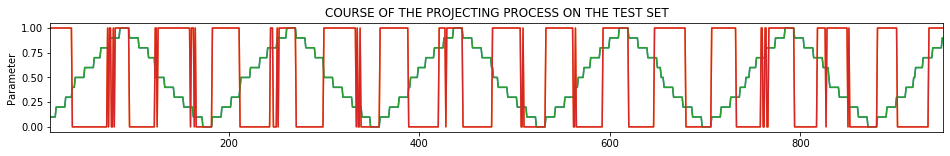

In [55]:
fig, ax = plt.subplots( figsize=(16, 2))
for ewa in ['y', 'y_interp']:
    ax.plot(NOWA, label=ewa)
    
ax.set_xlim(13, 950)
#ax.legend()
ax.set_ylabel('Parameter')
ax.set_title('COURSE OF THE PROJECTING PROCESS ON THE TEST SET')

<Figure size 432x288 with 0 Axes>

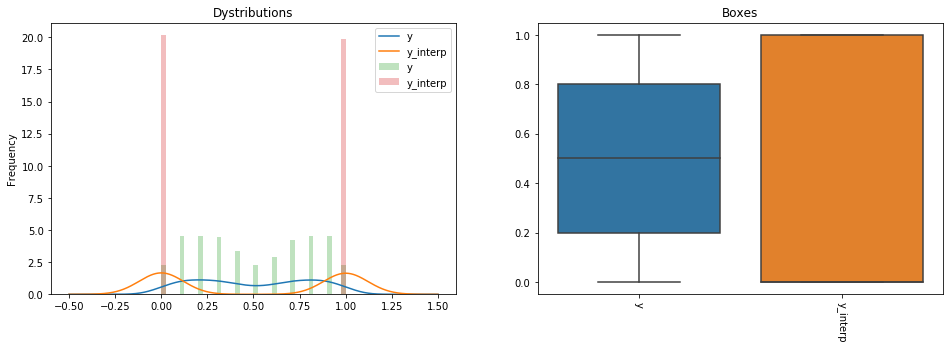

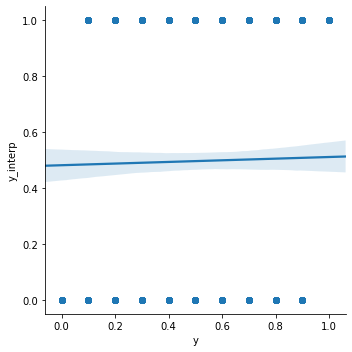

In [56]:
## marginesy
plt.subplots_adjust( left = None , bottom = None , right = None , top = None , wspace = None , hspace = None )
plt.figure(figsize=(16,5))
ax = plt.subplot(1, 2, 1)
NOWA.plot.kde(ax=ax, legend=True, title='Histogram: y vs. y_interp')
NOWA.plot.hist(density=True,bins=40, ax=ax, alpha=0.3)
ax.set_title("Dystributions")

ax = plt.subplot(1, 2, 2)
sns.boxplot(data = NOWA)
plt.xticks(rotation=-90)
ax.set_title("Boxes")


sns.lmplot(data=NOWA, x='y', y='y_interp')

<span style="font-size: 160%;color:#0c343d;background:#fff2cc"> Regression_Assessment

In [57]:
## Robi ocenę tylko dla jednej zmiennej

def Regression_Assessment(y, y_pred):
    
    from sklearn.metrics import r2_score 
    import scipy.stats as stats
    from statsmodels.graphics.gofplots import qqplot
    from matplotlib import pyplot
       
    print('-----two methods--------------')
    SS_Residual = sum((y-y_pred)**2)       
    SS_Total = sum((y-np.mean(y))**2)     
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-Xtrain.shape[1]-1)
    print('r2_score:           %0.3f' % r_squared)
    #print('adjusted_r_squared: %0.3f' % adjusted_r_squared)
    #print('----r2_score------secound-method--------')  
    print('r2_score:           %0.3f' % r2_score(y, y_pred))  
    print()
    print('-------------------------------')
    MAE = (abs(y-y_pred)).mean()
    print('Mean absolute error     MAE:  %0.2f ' %  MAE)
    RMSE = np.sqrt(((y-y_pred)**2).mean())
    print('Root mean squared error RMSE: %0.2f ' %  RMSE)
    pt = (100*(y-y_pred))/y
    MAPE = (abs(pt)).mean()
    print('Mean absolute error     MAPE: %0.2f ' %  MAPE)
    print('-------------------------------')
    
    stat,pvalue0 = stats.ttest_1samp(a=(y-y_pred),popmean=0.0)

    if pvalue0 > 0.01:
        print('t-test H0: the sum of the model residuals is zero')
        print('OKAY! Model remains do not differ from zero - pvalue:% 0.4f> 0.01 (we do NOT reject H0)'% pvalue0) 
    else:     
        print('Bad - Model remains DIFFERENT FROM ZERO - pvalue:% 0.4f <0.01 (We reject H0)'% pvalue0)  
    print('--------------------------------------------------------------------------------------------') 
  
       
    stat,pvalue2_1 = stats.shapiro(y)
    stat,pvalue2_2 = stats.shapiro(y_pred)

    if pvalue2_1 > 0.01:
        #print('Shapiro-Wilk H0: y have normal distribution?--------------------------------')
        print('OK Shapiro-Wolf! y have normal distribution - pvalue:% 0.4f> 0.01 (we do NOT reject H0)'% pvalue2_1) 
    else:     
        print('Bad Shapiro-Wilk - y NO NORMAL DISTRIBUTION - pvalue:% 0.4f <0.01 (We reject H0)'% pvalue2_1)  
        print('--------------------------------------------------------------------------------------------')
    if pvalue2_2 > 0.01:
        #print('Shapiro-Wilk: y_pred have a normal distribution?--')
        print('OK Shapiro-Wolf! y_pred has a normal distribution - pvalue:% 0.4f> 0.01 (we do NOT reject h0)'% pvalue2_2) 
    else:     
        print('Bad Shapiro-Wilk y_pred NO NORMAL DISTRIBUTION - pvalue:% 0.4f <0.01 (We reject H0)'% pvalue2_2)  
    
    qqplot(y, line='s')
    pyplot.show()

    qqplot(y_pred, line='s')
    pyplot.show()
       
    print('--------------------------------------------------------------------------------------------')
        
    stat,pvalue3 = stats.kruskal(y_pred,y)
    stat,pvalue4 = stats.f_oneway(y_pred,y)

    if pvalue2_1 < 0.01 or pvalue2_2 < 0.01:
        print('Shapiro-Vilk: Variables are not normally distributed! Cant do ANOV analysis')
     
        if pvalue3 > 0.01:
            print('Kruskal-Wallis NON-PARAMETRIC TEST: whether empirical forecast and observations. have equal means?')
            print('OKAY! Kruskal-Wallis H0: forecast and observations empir. have equal means - pvalue:% 0.4f> 0.01 (we do NOT reject H0)'% pvalue3) 
        else:     
            print('Bad - Kruskal-Wallis: forecast and observations empir. DO NOT HAVE EQUAL Averages - pvalue:% 0.4f <0.01 (We reject H0)'% pvalue3)  
    
    else:

        if pvalue4 > 0.01:
            print('F-test (ANOVA): whether empirical forecast and observations. have equal means?--------------------------------')
            print('OKAY! forecast and observations empir. have equal means - pvalue:% 0.4f> 0.01 (we do NOT reject H0)'% pvalue4) 
        else:     
            print('Bad - forecast and observations empir. DO NOT HAVE EQUAL Averages - pvalue:% 0.4f <0.01 (We reject H0)'% pvalue4)  
    print('--------------------------------------------------------------------------------------------')

-----two methods--------------
r2_score:           -2.555
r2_score:           -2.555

-------------------------------
Mean absolute error     MAE:  0.49 
Root mean squared error RMSE: 0.58 
Mean absolute error     MAPE: 171.44 
-------------------------------
t-test H0: the sum of the model residuals is zero
OKAY! Model remains do not differ from zero - pvalue: 0.8909> 0.01 (we do NOT reject H0)
--------------------------------------------------------------------------------------------
Bad Shapiro-Wilk - y NO NORMAL DISTRIBUTION - pvalue: 0.0000 <0.01 (We reject H0)
--------------------------------------------------------------------------------------------
Bad Shapiro-Wilk y_pred NO NORMAL DISTRIBUTION - pvalue: 0.0000 <0.01 (We reject H0)


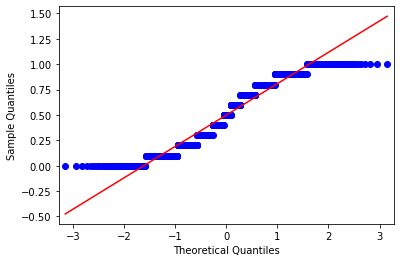

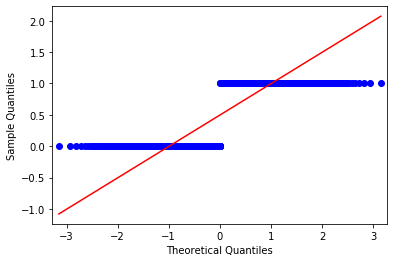

--------------------------------------------------------------------------------------------
Shapiro-Vilk: Variables are not normally distributed! Cant do ANOV analysis
Kruskal-Wallis NON-PARAMETRIC TEST: whether empirical forecast and observations. have equal means?
OKAY! Kruskal-Wallis H0: forecast and observations empir. have equal means - pvalue: 0.7477> 0.01 (we do NOT reject H0)
--------------------------------------------------------------------------------------------


In [58]:
y = NOWA['y']
y_interp = NOWA['y_interp']

Regression_Assessment(y, y_interp)

<span style="font-size: 160%;color:#0c343d;background:#fff2cc"> I choose quotes from the period 46-52 weeks is a super test period (7 weeks)


In [59]:
SuperTest = df2[df2.Week.isin([45,46,47,48,49,50,51,52])] 
SuperTest.head(4)

NameError: name 'df2' is not defined

<span style="font-size: 140%;background: white;font-weight:normal;color:#1155cc">Only the first 10 products

In [ ]:
SuperTest = SuperTest[SuperTest['Product_Code']<=10]
SuperTest.head(4)

In [ ]:
X12 = SuperTest.drop(['Sales'],1)
y12 = SuperTest['Sales']

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X12 = sc.fit_transform(X12)

print(np.round(X12.std(), decimals=2), np.round(X12.mean(), decimals=2))

In [ ]:
X12 = torch.tensor(X12)
X12 = X12.type(torch.FloatTensor).cuda()
print(X12[:3])

In [ ]:
y12 = (y12/ 100)  # max test score is 100
#print(y.head(3))
print('---------------------')
print(np.round(y12.std(), decimals=2), np.round(y12.mean(), decimals=2))

In [ ]:
y12.shape

In [ ]:
y12 = y12.values

In [ ]:
y12 = torch.tensor(y12).cuda()
print(y12[:3])

In [ ]:
y12 = y12.type(torch.FloatTensor).cuda()

In [ ]:
print('X12:',X12.shape)
print('y12:',y12.shape)

In [ ]:
print('X12:',X12[:3])
print('y12:',y12[:3])

In [ ]:
with torch.no_grad():
    y_model = KOT(X12)  
    loss = (y_model - y12).pow(2).sum()

    print(f'Loss train_set: {loss:.8f}')

In [ ]:
y_model = y_model*100
foka = y_model.cpu().detach().numpy()
df11 = pd.DataFrame(foka)
df11.columns = ['y_model']
df11=np.round(df11.y_model)
df11=df11.abs()
df11.head(3)

In [ ]:
df11 = pd.DataFrame(df11)
df11.head(5)

In [ ]:
print(y12[:3])

In [ ]:
y12 = torch.tensor(y12,device='cpu')
print(y12[:3])

In [ ]:
y12 = y12*100
#y12 = np.round(y12)
foka = y12.detach().numpy()
df_t = pd.DataFrame(foka)
df_t.columns = ['y12']
df_t.head(5)

In [ ]:
Super_NOWA = pd.merge(df_t,df11, how='inner', left_index=True, right_index=True)
Super_NOWA.head(3)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots( figsize=(16, 2))
for ewa in ['y12', 'y_model']:
    ax.plot(Super_NOWA, label=ewa)
    
ax.set_xlim(0, 70)
#ax.legend()
ax.set_ylabel('Parameter')
ax.set_title('COURSE OF THE PROJECTING PROCESS ON THE TEST SET')

In [ ]:
## marginesy
plt.subplots_adjust( left = None , bottom = None , right = None , top = None , wspace = None , hspace = None )
plt.figure(figsize=(16,5))
ax = plt.subplot(1, 2, 1)
Super_NOWA.plot.kde(ax=ax, legend=True, title='Histogram: y12 vs. y_model')
Super_NOWA.plot.hist(density=True,bins=40, ax=ax, alpha=0.3)
ax.set_title("Dystributions")

ax = plt.subplot(1, 2, 2)
sns.boxplot(data = Super_NOWA)
plt.xticks(rotation=-90)
ax.set_title("Boxes")


sns.lmplot(data=Super_NOWA, x='y12', y='y_model')

In [ ]:
y = Super_NOWA['y12']
y_pred = Super_NOWA['y_model']

Regression_Assessment(y, y_pred)